# Page Rank: How important a web page is
Search engine mechanism
1. Tour the web page in advance to collect information
2. List web pages that contain / relevant text entered by the user
3. **Arrange web pages in order of importance and return them to the user**

Arrange web pages in order of importance←today's topic

## Create graph (web pages)

node: web page
edge: link

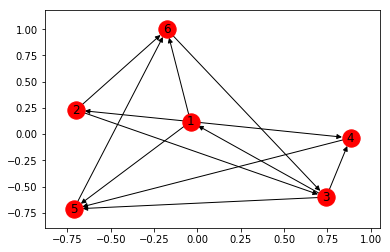

In [2]:
# -*- coding: utf-8 -*-
import networkx as nx
import numpy as np
# Directed Graph
g = nx.DiGraph()

# Add node = web page
g.add_node(1)
g.add_node(2)
g.add_node(3)                                                                                                                     
g.add_node(4)
g.add_node(5)
g.add_node(6)


#Add edge ("link")
g.add_edge(1,2)
g.add_edge(1,4)
g.add_edge(1,5)
g.add_edge(2,3)
g.add_edge(3,1)
g.add_edge(3,4)
g.add_edge(3,5)
g.add_edge(4,5)
g.add_edge(2,6)
g.add_edge(5,6)
g.add_edge(1,6)
g.add_edge(6,3)

nx.draw_networkx(g)

# PageRank 
PageRank is a google's algorithm to evaluate the imprtance of a webpage.

Page rank is based on the fact that　**"Important websites" are linked from many sites**.

**Larry Page** and **Sergey Brin** assumed the behavior of Internet users as a **random surfer** as follows.
1. Initial states: Everyone starts by randomly selecting the first page 
2. The person staying on one page transits to another page at the next time slice.
    The transition destination page is selected with equal probability from the linked pages from the currently staying page (**link transition**).
    Surfers occasionally(〜15%) fly to pages without links (does not have anything to do with sites you've been browsing) (**teleport**)
3. Rank a page with a **high probability of staying** as a useful page.

PageRank of a website A 
$$PR(A) = (1-\alpha)(teleport) + \alpha(link transition)$$
$$= (1-\alpha)(teleport) + \alpha (\sum_{i=1}^{n} \frac{PR(T_i)}{d(T_i)})$$

$\alpha$ : constant(mainly 0.85)

$n$ : number of web pages (nodes)

$PR(T_i)$ : PageRank of a page($Ti$) which has link to the website A

$d(T_i)$ : The number of the link from the page $Ti$  (equals to "outdegree")

By using networkX(nx), you can get the pagerank of the pages easily.

In [3]:
#pagerank
pr=nx.pagerank(g,alpha=0.85)
print("-----pagerank-----")
print(pr)

-----pagerank-----
{1: 0.09874162030309819, 2: 0.04598264175871525, 3: 0.2602674715555196, 4: 0.11972426206181344, 5: 0.22149035859853752, 6: 0.2537936457223158}


{1: Text(0,7,'1'),
 2: Text(4,14,'2'),
 3: Text(10,14,'3'),
 4: Text(14,7,'4'),
 5: Text(10,0,'5'),
 6: Text(4,0,'6')}

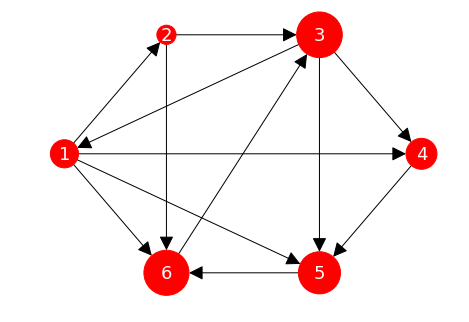

In [4]:
node_size = []
for i in range(1,7):
    node_size.append(pr[i] * 8000)

pos={}
pos[1]=(0,7)
pos[2]=(4,14)
pos[3]=(10,14)
pos[4]=(14,7)
pos[5]=(10,0)
pos[6]=(4,0)
nx.draw(g, pos, arrowsize=30, node_size = node_size)
nx.draw_networkx_labels(g, pos, font_size=18, font_color="w")

Q. How can we calculate the PR?
## A. **Use LINEAR ALGEBRA!!**

You can make the **transition matrix** .
1. Link transition matrix 
2. Teleportation matrix

## 1. Link transition

$$L_{ij}=\frac{A_{ij}}{d(i)}$$
$d(i)$ is the outdegree of the node i. $$d(i) = \sum_{j=0}^{n} A_{ij}$$

In [5]:
A = nx.to_numpy_matrix(g)
print(A)

[[0. 1. 0. 1. 1. 1.]
 [0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]]


For example, d(1) is 2

In [6]:
D = np.sum(A, axis=1)
print(D)

[[4.]
 [2.]
 [3.]
 [1.]
 [1.]
 [1.]]


In [7]:
L = np.zeros((6,6))
for i in range(0,6):
    for j in range(0,6):
        L[i,j] = A[i,j] * D[i]
print(L)

NameError: name 'D_inv' is not defined

## 2. Teleportation matrix (=Initial states)

In [9]:
T = np.full((1,6), 1/6)
print(T)

[[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]]


$$PR(time) = 0.15 * T + 0.85 * PR(time - 1) * L$$

In [10]:
PR1 = 0.15* T + 0.85 * np.dot(T, L)
print(PR1)

[[0.07222222 0.06041667 0.2375     0.10763889 0.24930556 0.27291667]]


In [11]:
def PR(t, T, L):
    if t == 1:
        return 0.15* T + 0.85 * np.dot(T, L)
    else:
        return 0.15 * T + 0.85 * np.dot(PR(t-1, T, L), L)

In [12]:
print(PR(1, T, L))

[[0.07222222 0.06041667 0.2375     0.10763889 0.24930556 0.27291667]]


In [13]:
print(PR(10, T, L))

[[0.0991236  0.0456917  0.26234495 0.1198153  0.22039447 0.25262998]]


In [14]:
pagerank20 = PR(20, T, L)
print(pagerank20)

[[0.09871457 0.04598071 0.26030431 0.11969528 0.22146421 0.25384093]]


{1: Text(0,7,'1'),
 2: Text(4,14,'2'),
 3: Text(10,14,'3'),
 4: Text(14,7,'4'),
 5: Text(10,0,'5'),
 6: Text(4,0,'6')}

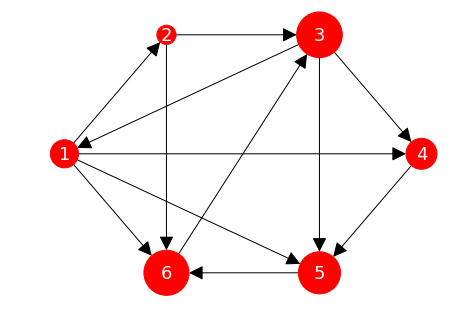

In [15]:
node_size = []
for i in range(0,6):
    node_size.append(pagerank20[0,i] * 8000)

pos={}
pos[1]=(0,7)
pos[2]=(4,14)
pos[3]=(10,14)
pos[4]=(14,7)
pos[5]=(10,0)
pos[6]=(4,0)
nx.draw(g, pos, arrowsize=30, node_size = node_size)
nx.draw_networkx_labels(g, pos, font_size=18, font_color="w")

**The calculation result is approaching the result of networkX!**
In reality, even t = 10 is considered sufficient.

In [24]:
print(D[1,0])

2.0


In [29]:
D_inv = np.zeros(6)

for j in range(6):
    D_inv[j] = np.reciprocal(D[j,0])
print(D_inv)

[0.25       0.5        0.33333333 1.         1.         1.        ]


In [31]:
resA= np.dot(A,D_inv)
print(resA)

[[3.5        1.33333333 2.25       1.         1.         0.33333333]]
